# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string


# Read Data File

In [2]:
df = pd.read_csv('financial_news_data.csv')

In [3]:
df.head()

,sentiment,news_headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.sentiment.value_counts()

neutral     2878
positive    1362
negative     603
Name: sentiment, dtype: int64

Ada 3 kelas berbeda yang berkaitan dengan sentimen.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      4843 non-null   object
 1   news_headline  4843 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


melihat apakah ada missing value atau tidak

In [6]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


sentiment        0
news_headline    0
dtype: int64

In [7]:
print(f"Is there any duplicated rows? \n{df.duplicated().any()}") #melihat duplikat dari data
print(f"\nHow many? \n{df.duplicated().sum()} rows")

Is there any duplicated rows? 
True

How many? 
6 rows


In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False) #menghaopus data duplikat

,sentiment,news_headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4838,negative,LONDON MarketWatch -- Share prices ended lower...
4839,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4840,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4841,negative,Net sales of the Paper segment decreased to EU...


## Distribution of Classes

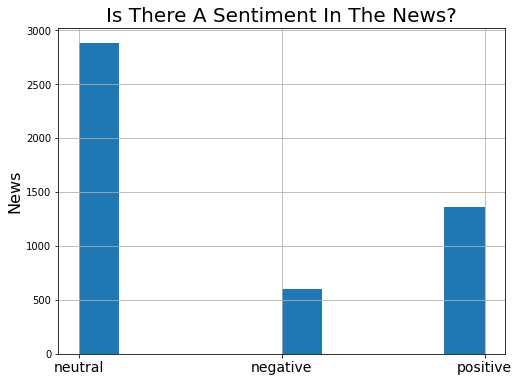

In [9]:
plt.figure(figsize=(8,6))
df.sentiment.hist(xlabelsize=14)
plt.title('Is There A Sentiment In The News?', fontsize=20)
plt.ylabel('News', fontsize=16)
plt.show()

terilhat bahwa sentimen netral yg lebih banyak dibandingan negatif dan positif

In [10]:
df['news_len'] = df.news_headline.apply(len) #membuat kolom baru untuk melihat panjang dari kalimat

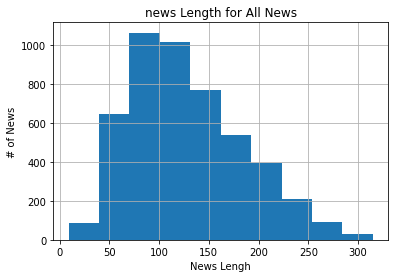

In [11]:
df.news_len.hist()
plt.title('news Length for All News')
plt.xlabel('News Lengh')
plt.ylabel('# of News')
plt.show()

melihat distribusi dari banyak nya kalimat di setiap data

In [12]:
import string

## Cleaning

In [13]:
def remove_punct(text): #menghapus tanda baca
    text_nopunct = ' '
    text_nopunct = re.sub('['+string.punctuation+']', ' ', text)
    return text_nopunct

df['Text_Clean'] = df['news_headline'].apply(lambda x: remove_punct(x))

In [14]:
# fungsi clean digunakan membersihkan simbol atau frasa yang tidak diperlukan
def cleanNews(news):
    news = news.lower()
    news = re.sub(r'\d+', ' ', news) # remove digits
    news = re.sub(r'\n', ' ', news) # remove enter to 1 space
    news = re.sub(r'\s+', ' ', news)# remove extra spaces
    return news

# mengaplikasikan proses cleaning
df['text_new'] = df.Text_Clean.astype(str).apply(cleanNews)

In [15]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in df.text_new] 

In [16]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 

In [17]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [18]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [19]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens] 

In [20]:
result = [' '.join(sen) for sen in filtered_words] 

In [21]:
df['Text_Final'] = result

In [22]:
df['tokens'] = filtered_words

In [23]:
df

,sentiment,news_headline,news_len,Text_Clean,text_new,Text_Final,tokens
0,neutral,"According to Gran , the company has no plans t...",127,According to Gran the company has no plans t...,according to gran the company has no plans to ...,according gran company plans move production r...,"[according, gran, company, plans, move, produc..."
1,neutral,Technopolis plans to develop in stages an area...,190,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,technopolis plans develop stages area less squ...,"[technopolis, plans, develop, stages, area, le..."
2,negative,The international electronic industry company ...,228,The international electronic industry company ...,the international electronic industry company ...,international electronic industry company elco...,"[international, electronic, industry, company,..."
3,positive,With the new production plant the company woul...,206,With the new production plant the company woul...,with the new production plant the company woul...,new production plant company would increase ca...,"[new, production, plant, company, would, incre..."
4,positive,According to the company 's updated strategy f...,203,According to the company s updated strategy f...,according to the company s updated strategy fo...,according company updated strategy years baswa...,"[according, company, updated, strategy, years,..."
...,...,...,...,...,...,...,...
4838,negative,LONDON MarketWatch -- Share prices ended lower...,144,LONDON MarketWatch Share prices ended lower...,london marketwatch share prices ended lower in...,london marketwatch share prices ended lower lo...,"[london, marketwatch, share, prices, ended, lo..."
4839,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,148,Rinkuskiai s beer sales fell by 6 5 per cent ...,rinkuskiai s beer sales fell by per cent to mi...,rinkuskiai beer sales fell per cent million li...,"[rinkuskiai, beer, sales, fell, per, cent, mil..."
4840,negative,Operating profit fell to EUR 35.4 mn from EUR ...,108,Operating profit fell to EUR 35 4 mn from EUR ...,operating profit fell to eur mn from eur mn in...,operating profit fell eur mn eur mn including ...,"[operating, profit, fell, eur, mn, eur, mn, in..."
4841,negative,Net sales of the Paper segment decreased to EU...,226,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...,net sales paper segment decreased eur mn secon...,"[net, sales, paper, segment, decreased, eur, m..."


In [24]:
df = df[['sentiment','Text_Final']]

In [25]:
df

,sentiment,Text_Final
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less squ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy years baswa...
...,...,...
4838,negative,london marketwatch share prices ended lower lo...
4839,neutral,rinkuskiai beer sales fell per cent million li...
4840,negative,operating profit fell eur mn eur mn including ...
4841,negative,net sales paper segment decreased eur mn secon...


In [26]:
# Encode target labels
repl = {'neutral':0,'positive':1,'negative':2}
df['sentiment'].replace(repl, inplace=True)

c:\users\denni\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df["Text_Final"],df["sentiment"], test_size = 0.2, random_state = 42)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [30]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [31]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [32]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(3874, 7776)
(3874, 7776)


In [33]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [34]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(969, 7776)
(969, 7776)


# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train_tfidf,y_train)

LogisticRegression()

In [36]:
predLR=model1.predict(x_test_tfidf)

In [37]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predLR)
print(c_m)

[[536  23   3]
 [148 138   8]
 [ 50  18  45]]


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predLR)

0.7420020639834881

# Decision Tree 

In [39]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [40]:
predDT=model2.predict(x_test_tfidf)

In [41]:
c_m = confusion_matrix(y_test,predDT)
print(c_m)

[[434  94  34]
 [103 168  23]
 [ 38  24  51]]


In [42]:
accuracy_score(y_test,predDT)

0.673890608875129

# Support Vector Machines

In [43]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train_tfidf,y_train)

SVC()

In [44]:
predSVC=model3.predict(x_test_tfidf)

In [45]:
c_m = confusion_matrix(y_test,predSVC)
print(c_m)

[[542  16   4]
 [176 109   9]
 [ 55  14  44]]


In [46]:
accuracy_score(y_test,predSVC)

0.717234262125903

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [48]:
predRF = model4.predict(x_test_tfidf)

In [49]:
from sklearn.metrics import confusion_matrix,f1_score
c_m = confusion_matrix(y_test,predRF)
c_m

array([[538,  19,   5],
       [143, 141,  10],
       [ 45,  17,  51]], dtype=int64)

In [50]:
accuracy_score(y_test,predRF)

0.7533539731682146

In [51]:
tp,fn,fp,tn = c_m[0][0],c_m[0][1],c_m[1][0],c_m[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.9658886894075404
precision =  0.7900146842878121
F1_score =  0.8691437802907915


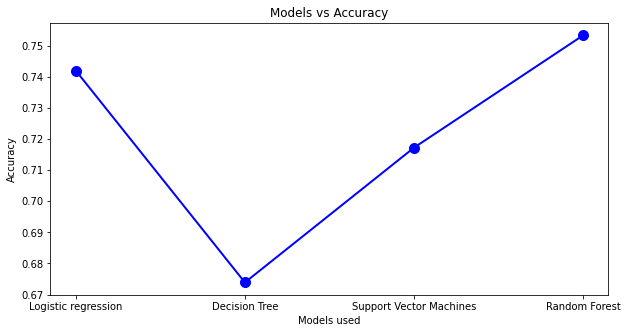

In [52]:
mod_accuracy=[accuracy_score(y_test,predLR),accuracy_score(y_test,predDT),accuracy_score(y_test,predSVC),accuracy_score(y_test,predRF)]
models=["Logistic regression","Decision Tree","Support Vector Machines","Random Forest"]
plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'bo',linestyle='solid',linewidth=2, markersize=10)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()

In [53]:
df

,sentiment,Text_Final
0,0,according gran company plans move production r...
1,0,technopolis plans develop stages area less squ...
2,2,international electronic industry company elco...
3,1,new production plant company would increase ca...
4,1,according company updated strategy years baswa...
...,...,...
4838,2,london marketwatch share prices ended lower lo...
4839,0,rinkuskiai beer sales fell per cent million li...
4840,2,operating profit fell eur mn eur mn including ...
4841,2,net sales paper segment decreased eur mn secon...


### Model LSTM 

In [54]:
X = df['Text_Final']
y = df['sentiment']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=42)

In [56]:
train_data = {'text' : X_train,
              'label': y_train}

test_data  = {'text' : X_test,
              'label': y_test}

In [57]:
train_df = pd.DataFrame(train_data)
test_df  = pd.DataFrame(test_data)

In [58]:
train = train_df
test = test_df

In [59]:
file = open('train.txt', 'w+')

for i in train.index:
  line = '_label_'+str(train['label'][i])+' '+train['text'][i]
  file.write(line+'\n')

In [60]:
file = open('test.txt', 'w+')

for i in test.index:
  line = test['text'][i]
  file.write(line+'\n')

In [61]:
y_train = train['label'].tolist()

In [64]:
import codecs
from tqdm import tqdm
import numpy as np

embeding untuk mengfilter kosakata yang tidak di pakai 

In [65]:
print('\n=============================')
print(' > Loading Word Embeddings > ')
print('=============================')

embeddings_index = {}

f = codecs.open(r'C:\Users\denni\Documents\data_science\Tugas\wiki-news-300d-1M.vec', encoding='utf-8')

for line in tqdm(f):
  values = line.rstrip().rsplit(' ')
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

f.close()

print('\n\nNumber of Word Vectors : ', len(embeddings_index))
print('Number of Train Data   : ', train.shape[0])
print('Number of Test Data    : ', test.shape[0])


 > Loading Word Embeddings > 


999995it [01:32, 10837.47it/s]



Number of Word Vectors :  999995
Number of Train Data   :  3390
Number of Test Data    :  1453


In [69]:
label_names = ['neutral', 'positive','negative']

train['doc_len'] = train['text'].apply(lambda words: len(words.split(' ')))

max_seq_len = np.max(train['doc_len'])+1

In [70]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [71]:
raw_docs_train = train['text'].tolist()
raw_docs_test  = test['text'].tolist()


MAX_NB_WORDS = 10000
num_classes = len(label_names)

print('=============================')
print(' >> Tokenizing Input Data >> ')
print('=============================')

tokenizer = Tokenizer(num_words=MAX_NB_WORDS,
                      lower=True,
                      char_level=False)
tokenizer.fit_on_texts(raw_docs_train + raw_docs_test)


word_seq_train = tokenizer.texts_to_sequences(raw_docs_train)
word_seq_test  = tokenizer.texts_to_sequences(raw_docs_test)

word_index = tokenizer.word_index

print('Dictionary Size: ', len(word_index))

word_seq_train = sequence.pad_sequences(word_seq_train, maxlen = max_seq_len)
word_seq_test  = sequence.pad_sequences(word_seq_test, maxlen = max_seq_len)

 >> Tokenizing Input Data >> 
Dictionary Size:  8966


In [72]:
batch_size  = 256
num_epochs  = 200

embed_dim   = 300
num_filters = 64

In [73]:
print('==================================')
print(' >> Preparing Embedding Matrix >> ')
print('==================================')

words_not_found = []

nb_words = min(MAX_NB_WORDS, len(word_index))

embedding_matrix = np.zeros((nb_words+1, embed_dim))

for word, i in word_index.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    embedding_matrix[i] = embedding_vector
  else:
    words_not_found.append(word)

print('Number of Null Word Embeddings : %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
print("Sample Words Not Found         :", np.random.choice(words_not_found, 5))

 >> Preparing Embedding Matrix >> 
Number of Null Word Embeddings : 1776
Sample Words Not Found         : ['glaston' 'adac' 'companiesandmarkets' 'opk' 'beltton']


In [75]:
from tensorflow.keras.utils import to_categorical

In [76]:
target = []

for i in train['label']:
  if i == 0:
    target.append(0)
  elif i == 1:
    target.append(1)
  elif i == 2:
    target.append(2)

train['new_label'] = target

train_labels = to_categorical(train['new_label'])

In [78]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
# import library untuk melakukan pemodelan
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,GlobalMaxPool1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

In [82]:
# model keras sequental
model1 = keras.models.Sequential([
    keras.layers.Embedding(nb_words+1, embed_dim,
                    weights=[embedding_matrix],
                    input_length=max_seq_len,
                    trainable=False),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(20,activation="tanh"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')
])
# keras.utils.plot_model(model1, "tweet.png", show_shapes=True)

In [83]:
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 42, 300)           2690100   
                                                                 
 dropout_3 (Dropout)         (None, 42, 300)           0         
                                                                 
 dense_2 (Dense)             (None, 42, 20)            6020      
                                                                 
 dropout_4 (Dropout)         (None, 42, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [84]:
hist1 = model1.fit(word_seq_train,
                 train_labels,
                 batch_size = batch_size,
                 epochs = num_epochs,
                 validation_split=0.2,
                 shuffle=True,
                 verbose=2)

Epoch 1/200
11/11 - 17s - loss: 1.0438 - accuracy: 0.5822 - val_loss: 0.9914 - val_accuracy: 0.6047 - 17s/epoch - 2s/step
Epoch 2/200
11/11 - 0s - loss: 0.9707 - accuracy: 0.5977 - val_loss: 0.9262 - val_accuracy: 0.6047 - 144ms/epoch - 13ms/step
Epoch 3/200
11/11 - 0s - loss: 0.9275 - accuracy: 0.5985 - val_loss: 0.9066 - val_accuracy: 0.6047 - 148ms/epoch - 13ms/step
Epoch 4/200
11/11 - 0s - loss: 0.9051 - accuracy: 0.5951 - val_loss: 0.8935 - val_accuracy: 0.6047 - 165ms/epoch - 15ms/step
Epoch 5/200
11/11 - 0s - loss: 0.8902 - accuracy: 0.6025 - val_loss: 0.8729 - val_accuracy: 0.6106 - 145ms/epoch - 13ms/step
Epoch 6/200
11/11 - 0s - loss: 0.8685 - accuracy: 0.6117 - val_loss: 0.8570 - val_accuracy: 0.6342 - 143ms/epoch - 13ms/step
Epoch 7/200
11/11 - 0s - loss: 0.8512 - accuracy: 0.6364 - val_loss: 0.8427 - val_accuracy: 0.6401 - 166ms/epoch - 15ms/step
Epoch 8/200
11/11 - 0s - loss: 0.8411 - accuracy: 0.6357 - val_loss: 0.8322 - val_accuracy: 0.6475 - 159ms/epoch - 14ms/step
Epo

Epoch 67/200
11/11 - 0s - loss: 0.4957 - accuracy: 0.7998 - val_loss: 0.6074 - val_accuracy: 0.7552 - 147ms/epoch - 13ms/step
Epoch 68/200
11/11 - 0s - loss: 0.4907 - accuracy: 0.8119 - val_loss: 0.5962 - val_accuracy: 0.7625 - 166ms/epoch - 15ms/step
Epoch 69/200
11/11 - 0s - loss: 0.5049 - accuracy: 0.7928 - val_loss: 0.6007 - val_accuracy: 0.7581 - 178ms/epoch - 16ms/step
Epoch 70/200
11/11 - 0s - loss: 0.4841 - accuracy: 0.8020 - val_loss: 0.5868 - val_accuracy: 0.7640 - 155ms/epoch - 14ms/step
Epoch 71/200
11/11 - 0s - loss: 0.4804 - accuracy: 0.7998 - val_loss: 0.6013 - val_accuracy: 0.7537 - 144ms/epoch - 13ms/step
Epoch 72/200
11/11 - 0s - loss: 0.4934 - accuracy: 0.8016 - val_loss: 0.5888 - val_accuracy: 0.7670 - 166ms/epoch - 15ms/step
Epoch 73/200
11/11 - 0s - loss: 0.5023 - accuracy: 0.7957 - val_loss: 0.5990 - val_accuracy: 0.7640 - 146ms/epoch - 13ms/step
Epoch 74/200
11/11 - 0s - loss: 0.4881 - accuracy: 0.7957 - val_loss: 0.5931 - val_accuracy: 0.7640 - 158ms/epoch - 14

Epoch 132/200
11/11 - 0s - loss: 0.4148 - accuracy: 0.8337 - val_loss: 0.6113 - val_accuracy: 0.7699 - 144ms/epoch - 13ms/step
Epoch 133/200
11/11 - 0s - loss: 0.4153 - accuracy: 0.8400 - val_loss: 0.6168 - val_accuracy: 0.7743 - 153ms/epoch - 14ms/step
Epoch 134/200
11/11 - 0s - loss: 0.4146 - accuracy: 0.8326 - val_loss: 0.6074 - val_accuracy: 0.7714 - 153ms/epoch - 14ms/step
Epoch 135/200
11/11 - 0s - loss: 0.4146 - accuracy: 0.8396 - val_loss: 0.6096 - val_accuracy: 0.7670 - 156ms/epoch - 14ms/step
Epoch 136/200
11/11 - 0s - loss: 0.4299 - accuracy: 0.8300 - val_loss: 0.6072 - val_accuracy: 0.7699 - 162ms/epoch - 15ms/step
Epoch 137/200
11/11 - 0s - loss: 0.4048 - accuracy: 0.8429 - val_loss: 0.6130 - val_accuracy: 0.7714 - 148ms/epoch - 13ms/step
Epoch 138/200
11/11 - 0s - loss: 0.4120 - accuracy: 0.8367 - val_loss: 0.6388 - val_accuracy: 0.7655 - 174ms/epoch - 16ms/step
Epoch 139/200
11/11 - 0s - loss: 0.4143 - accuracy: 0.8326 - val_loss: 0.6130 - val_accuracy: 0.7699 - 153ms/ep

Epoch 197/200
11/11 - 0s - loss: 0.3777 - accuracy: 0.8555 - val_loss: 0.6308 - val_accuracy: 0.7611 - 161ms/epoch - 15ms/step
Epoch 198/200
11/11 - 0s - loss: 0.3656 - accuracy: 0.8555 - val_loss: 0.6290 - val_accuracy: 0.7788 - 156ms/epoch - 14ms/step
Epoch 199/200
11/11 - 0s - loss: 0.3845 - accuracy: 0.8437 - val_loss: 0.6261 - val_accuracy: 0.7773 - 148ms/epoch - 13ms/step
Epoch 200/200
11/11 - 0s - loss: 0.3757 - accuracy: 0.8507 - val_loss: 0.6287 - val_accuracy: 0.7684 - 156ms/epoch - 14ms/step


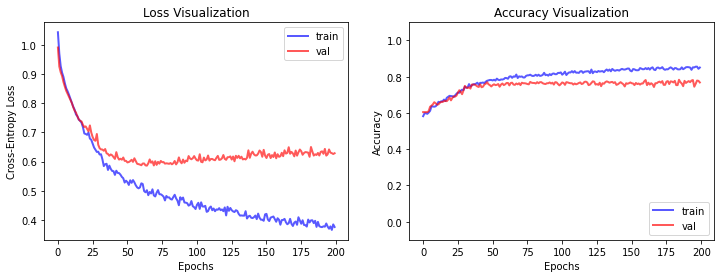

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(hist1.history['loss'], lw=2.0, color='b', alpha=0.65, label='train')
ax1.plot(hist1.history['val_loss'], lw=2.0, color='r', alpha=0.65, label='val')
ax1.set_title('Loss Visualization')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Cross-Entropy Loss')
ax1.legend(loc='upper right')
ax2.plot(hist1.history['accuracy'], lw=2.0, color='b', alpha=0.65, label='train')
ax2.plot(hist1.history['val_accuracy'], lw=2.0, color='r', alpha=0.65, label='val')
ax2.set_title('Accuracy Visualization')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

ax1.grid(False)
ax2.grid(False)

ax2.set_ylim(-0.1, 1.1)
plt.show()

In [86]:
test

,text,label
3203,company says measures longer needed,0
1957,see new post inspiring challenge,0
1044,lee man combined annual production capacity cl...,0
2732,coker crane supplied tesoro corporation golden...,0
1538,finland corresponding service alma media etuov...,0
...,...,...
1730,company make marketing sales investments initi...,1
4448,return capital employed roce negative compared,2
2222,earnings comparative period included capital g...,0
3712,outotec delivery covers engineering supply con...,0


In [90]:
raw_docs_test  = test['text']

word_seq_test  = tokenizer.texts_to_sequences(raw_docs_test)

word_seq_test  = sequence.pad_sequences(word_seq_test, maxlen = 42)

In [91]:
y_test = test['label']

In [92]:
y_pred = model1.predict(word_seq_test).round()

In [93]:
pred_df = pd.DataFrame(data=y_pred)

In [94]:
y_pred = pred_df.values.argmax(1)

In [95]:
from keras.models import load_model
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle
import pandas as pd
import numpy as np

%matplotlib inline

In [96]:
cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy ' +str(accuracy_score(y_test, y_pred)))

[[748  73  24]
 [151 272  10]
 [ 48  23 104]]
Accuracy 0.7735719201651755


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       845
           1       0.74      0.63      0.68       433
           2       0.75      0.59      0.66       175

    accuracy                           0.77      1453
   macro avg       0.76      0.70      0.73      1453
weighted avg       0.77      0.77      0.77      1453



In [98]:
df = pd.read_csv('data_for_test_the_model.csv')

In [99]:
df

,number,news_headline
0,1,The 2015 target for net sales has been set at ...
1,2,It holds 38 percent of Outokumpu 's shares and...
2,3,"As a result of these transactions , the aggreg..."


In [100]:
raw_docs_test  = df['news_headline']

word_seq_test  = tokenizer.texts_to_sequences(raw_docs_test)

word_seq_test  = sequence.pad_sequences(word_seq_test, maxlen = 42)

In [101]:
y_pred = model1.predict(word_seq_test).round()

In [102]:
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

Jawaban prediksi = neutral , neutral, Negative